In [4]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")

import warnings
warnings.filterwarnings('ignore')

import os
if os.name == 'nt' : # windows OS
    font_family = "Malgun Gothic"
else : #Mac OS
    font_family = "AppleGothic"
    
# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

In [27]:
busan_df = pd.read_csv('C:/Users/user/공공빅데이터_프로젝트/전처리데이터/부산전처리.csv', encoding = "EUC-KR")
busan_df

,시군구코드,시군구명,총생산,총생산인구수,수소차대수,총인구수,주차장개수,도시공원_개수,주유소개수
0,26110,중구,3119522,25421,19,40524,33,3,2
1,26140,서구,2977265,64499,57,105164,25,4,10
2,26170,동구,4768625,53363,31,87679,38,3,10
3,26200,영도구,2731839,64266,47,110638,28,4,10
4,26230,부산진구,8886673,239032,191,353159,72,8,24
5,26260,동래구,4097686,175318,109,266866,11,9,18
6,26290,남구,5649213,172636,102,262069,47,8,31
7,26320,북구,3116148,187153,115,283211,25,13,18
8,26350,해운대구,9503602,269366,155,396438,45,19,35
9,26380,사하구,7190129,203308,124,306003,54,10,31


In [6]:
del busan_df['시군구명']
del busan_df['시군구코드']
busan_df

,총생산,총생산인구수,수소차대수,총인구수,주차장개수,도시공원_개수,주유소개수
0,3119522,25421,19,40524,33,3,2
1,2977265,64499,57,105164,25,4,10
2,4768625,53363,31,87679,38,3,10
3,2731839,64266,47,110638,28,4,10
4,8886673,239032,191,353159,72,8,24
5,4097686,175318,109,266866,11,9,18
6,5649213,172636,102,262069,47,8,31
7,3116148,187153,115,283211,25,13,18
8,9503602,269366,155,396438,45,19,35
9,7190129,203308,124,306003,54,10,31


In [7]:
busan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   총생산      16 non-null     int64
 1   총생산인구수   16 non-null     int64
 2   수소차대수    16 non-null     int64
 3   총인구수     16 non-null     int64
 4   주차장개수    16 non-null     int64
 5   도시공원_개수  16 non-null     int64
 6   주유소개수    16 non-null     int64
dtypes: int64(7)
memory usage: 1.0 KB


In [8]:
busan_df.shape

(16, 7)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
standard_scaler = StandardScaler()
bs_scaled_df = pd.DataFrame(standard_scaler.fit_transform(busan_df), 
                              columns=busan_df.columns)

In [11]:
bs_scaled_df.head()

,총생산,총생산인구수,수소차대수,총인구수,주차장개수,도시공원_개수,주유소개수
0,-0.884108,-1.690794,-1.713636,-1.759129,0.158974,-0.667155,-1.564059
1,-0.930798,-1.102395,-0.909087,-1.085789,-0.273976,-0.566452,-0.992061
2,-0.342858,-1.270070,-1.459568,-1.267927,0.429567,-0.667155,-0.992061
3,-1.011349,-1.105903,-1.120811,-1.028768,-0.111620,-0.566452,-0.992061
4,1.008722,1.525554,1.928006,1.497517,2.269600,-0.163642,0.008937


In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
pca.fit(bs_scaled_df)
bs_pca = pca.transform(bs_scaled_df)
print(bs_pca.shape)

(16, 2)


In [14]:
pca_columns = ['pca_components_1', 'pca_components_2']
bs_pca_df = pd.DataFrame(bs_pca, columns = pca_columns)
bs_pca_df

,pca_components_1,pca_components_2
0,3.426589,0.059181
1,2.317125,0.113682
2,2.449184,-0.094284
3,2.410584,-0.023206
4,-2.823766,-2.250309
5,-0.052795,-0.124012
6,-0.713868,-0.827359
7,-0.341852,-0.589019
8,-3.375328,-0.900529
9,-1.626877,-1.174207


# k-means 군집분석

In [15]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 5)

# 정규화된 데이터에 학습
model.fit(bs_pca_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
bs_pca_df['cluster'] = model.fit_predict(bs_pca_df)

In [16]:
bs_pca_df


,pca_components_1,pca_components_2,cluster
0,3.426589,0.059181,0
1,2.317125,0.113682,0
2,2.449184,-0.094284,0
3,2.410584,-0.023206,0
4,-2.823766,-2.250309,1
5,-0.052795,-0.124012,2
6,-0.713868,-0.827359,2
7,-0.341852,-0.589019,2
8,-3.375328,-0.900529,1
9,-1.626877,-1.174207,1


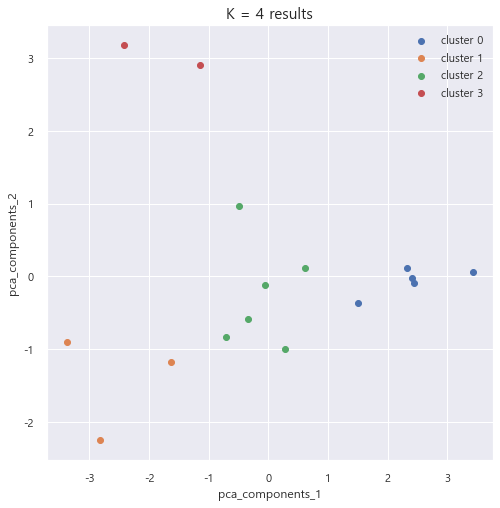

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(bs_pca_df.loc[bs_pca_df['cluster'] == i, 'pca_components_1'], 
                bs_pca_df.loc[bs_pca_df['cluster'] == i, 'pca_components_2'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('pca_components_1', size = 12)
plt.ylabel('pca_components_2', size = 12)
plt.show()

In [18]:
from yellowbrick.cluster import KElbowVisualizer

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

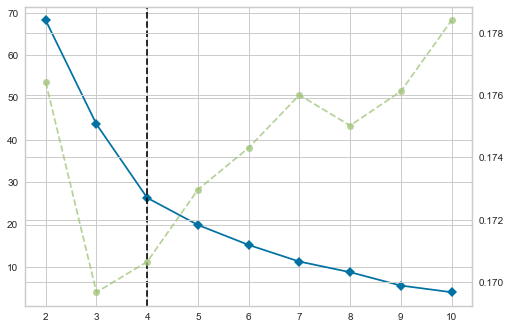

In [19]:
model = KMeans()
visualizer = KElbowVisualizer(model, K=(1,10))
visualizer.fit(bs_scaled_df)

In [20]:
cluster_g = bs_pca_df.groupby('cluster')
cluster_g.head()

,pca_components_1,pca_components_2,cluster
0,3.426589,0.059181,0
1,2.317125,0.113682,0
2,2.449184,-0.094284,0
3,2.410584,-0.023206,0
4,-2.823766,-2.250309,1
5,-0.052795,-0.124012,2
6,-0.713868,-0.827359,2
7,-0.341852,-0.589019,2
8,-3.375328,-0.900529,1
9,-1.626877,-1.174207,1


In [21]:
df = pd.DataFrame(bs_pca_df['cluster'])
df

,cluster
0,0
1,0
2,0
3,0
4,1
5,2
6,2
7,2
8,1
9,1


In [22]:
bs_pca_df.groupby('cluster').get_group(0)

,pca_components_1,pca_components_2,cluster
0,3.426589,0.059181,0
1,2.317125,0.113682,0
2,2.449184,-0.094284,0
3,2.410584,-0.023206,0
13,1.495937,-0.362890,0


In [23]:
bs_pca_df.groupby('cluster').get_group(1)

,pca_components_1,pca_components_2,cluster
4,-2.823766,-2.250309,1
8,-3.375328,-0.900529,1
9,-1.626877,-1.174207,1


In [24]:
bs_pca_df.groupby('cluster').get_group(2)

,pca_components_1,pca_components_2,cluster
5,-0.052795,-0.124012,2
6,-0.713868,-0.827359,2
7,-0.341852,-0.589019,2
10,0.278424,-1.003758,2
12,0.619358,0.118777,2
14,-0.489991,0.965859,2


In [25]:
bs_pca_df.groupby('cluster').get_group(3)

,pca_components_1,pca_components_2,cluster
11,-2.421343,3.185742,3
15,-1.151381,2.906331,3


In [28]:
aa = pd.DataFrame(busan_df['시군구명'])
aa

,시군구명
0,중구
1,서구
2,동구
3,영도구
4,부산진구
5,동래구
6,남구
7,북구
8,해운대구
9,사하구


In [29]:
total = pd.concat([aa, bs_pca_df], axis = 1 )
total

,시군구명,pca_components_1,pca_components_2,cluster
0,중구,3.426589,0.059181,0
1,서구,2.317125,0.113682,0
2,동구,2.449184,-0.094284,0
3,영도구,2.410584,-0.023206,0
4,부산진구,-2.823766,-2.250309,1
5,동래구,-0.052795,-0.124012,2
6,남구,-0.713868,-0.827359,2
7,북구,-0.341852,-0.589019,2
8,해운대구,-3.375328,-0.900529,1
9,사하구,-1.626877,-1.174207,1


In [30]:
total.groupby('cluster').get_group(0)

,시군구명,pca_components_1,pca_components_2,cluster
0,중구,3.426589,0.059181,0
1,서구,2.317125,0.113682,0
2,동구,2.449184,-0.094284,0
3,영도구,2.410584,-0.023206,0
13,수영구,1.495937,-0.362890,0


In [31]:
total.groupby('cluster').get_group(1)

,시군구명,pca_components_1,pca_components_2,cluster
4,부산진구,-2.823766,-2.250309,1
8,해운대구,-3.375328,-0.900529,1
9,사하구,-1.626877,-1.174207,1


In [32]:
total.groupby('cluster').get_group(2)

,시군구명,pca_components_1,pca_components_2,cluster
5,동래구,-0.052795,-0.124012,2
6,남구,-0.713868,-0.827359,2
7,북구,-0.341852,-0.589019,2
10,금정구,0.278424,-1.003758,2
12,연제구,0.619358,0.118777,2
14,사상구,-0.489991,0.965859,2


In [33]:
total.groupby('cluster').get_group(3)

,시군구명,pca_components_1,pca_components_2,cluster
11,강서구,-2.421343,3.185742,3
15,기장군,-1.151381,2.906331,3


In [34]:
total.sort_values('cluster')

,시군구명,pca_components_1,pca_components_2,cluster
0,중구,3.426589,0.059181,0
1,서구,2.317125,0.113682,0
2,동구,2.449184,-0.094284,0
3,영도구,2.410584,-0.023206,0
13,수영구,1.495937,-0.362890,0
4,부산진구,-2.823766,-2.250309,1
8,해운대구,-3.375328,-0.900529,1
9,사하구,-1.626877,-1.174207,1
5,동래구,-0.052795,-0.124012,2
6,남구,-0.713868,-0.827359,2


In [35]:
total = total.sort_values('cluster')
total

,시군구명,pca_components_1,pca_components_2,cluster
0,중구,3.426589,0.059181,0
1,서구,2.317125,0.113682,0
2,동구,2.449184,-0.094284,0
3,영도구,2.410584,-0.023206,0
13,수영구,1.495937,-0.362890,0
4,부산진구,-2.823766,-2.250309,1
8,해운대구,-3.375328,-0.900529,1
9,사하구,-1.626877,-1.174207,1
5,동래구,-0.052795,-0.124012,2
6,남구,-0.713868,-0.827359,2


In [36]:
del total['pca_components_1']
del total['pca_components_2']
total

,시군구명,cluster
0,중구,0
1,서구,0
2,동구,0
3,영도구,0
13,수영구,0
4,부산진구,1
8,해운대구,1
9,사하구,1
5,동래구,2
6,남구,2


In [ ]:
total.to_csv("군집분석_주애림.csv", encoding = "EUC-KR")

# 계층적군집분석

In [ ]:
 from scipy.cluster.hierarchy import linkage, dendrogram

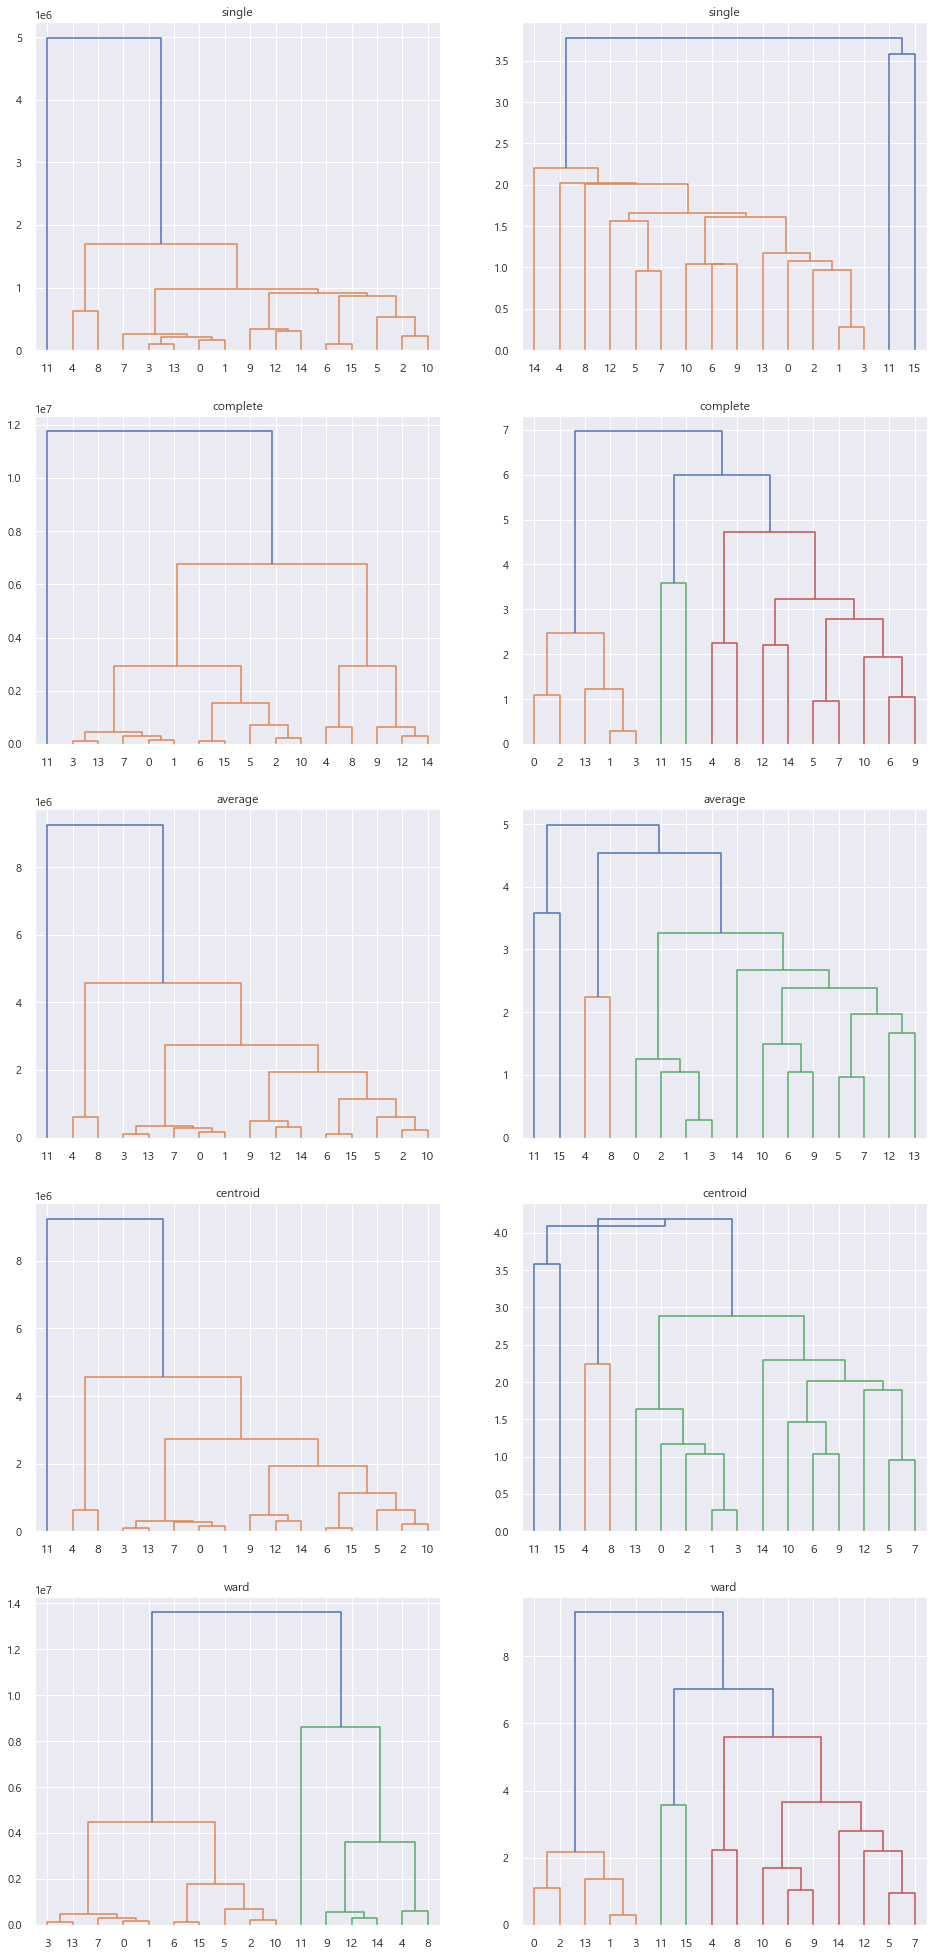

In [31]:
linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']
data = [busan_df, bs_scaled_df]

fig, axes = plt.subplots(nrows=len(linkage_list), ncols=2, figsize=(16, 35))
for i in range(len(linkage_list)):
    for j in range(len(data)):
        hierarchical_single = linkage(data[j], method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i][j])
        axes[i][j].title.set_text(linkage_list[i])
plt.show()